In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,accuracy_score,auc,log_loss
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA


In [2]:
import os
import skimage
import skimage.io
from skimage import transform
from skimage.transform import resize
from skimage.color import rgb2gray
import cv2

In [3]:
def load_data(data_dir):
    dirs = [d for d in os.listdir(data_dir)
            if os.path.isdir(os.path.join(data_dir,d))]
    
    labels = []
    images = []
    
    label_map = {label: inx for inx,label in enumerate(dirs)}
    
    for d in dirs:
        label_dir = os.path.join(data_dir,d)
        
        file_name = [os.path.join(label_dir,f)
                    for f in os.listdir(label_dir) 
                    if f.endswith(".jpg")]
        
        for f in file_name:
            print(f)
            img = skimage.io.imread(f)
            img_resize = resize(img, (28,28,3))
            gray_img = rgb2gray(img_resize)
            images.append(gray_img.flatten())
            labels.append(label_map[d])
    return images, labels

In [4]:
root_path = "/home/doaa/programming/ML/MLClassifieProject"
train_data_dir = os.path.join(root_path,"Training")
test_data_dir = os.path.join(root_path,"Test")

In [5]:
images , labels = load_data(train_data_dir)

/home/doaa/programming/ML/MLClassifieProject/Training/apple_granny_smith_1/r1_252.jpg
/home/doaa/programming/ML/MLClassifieProject/Training/apple_granny_smith_1/r1_270.jpg
/home/doaa/programming/ML/MLClassifieProject/Training/apple_granny_smith_1/r1_112.jpg
/home/doaa/programming/ML/MLClassifieProject/Training/apple_granny_smith_1/r1_258.jpg
/home/doaa/programming/ML/MLClassifieProject/Training/apple_granny_smith_1/r1_210.jpg
/home/doaa/programming/ML/MLClassifieProject/Training/apple_granny_smith_1/r1_76.jpg
/home/doaa/programming/ML/MLClassifieProject/Training/apple_granny_smith_1/r1_82.jpg
/home/doaa/programming/ML/MLClassifieProject/Training/apple_granny_smith_1/r0_38.jpg
/home/doaa/programming/ML/MLClassifieProject/Training/apple_granny_smith_1/r1_36.jpg
/home/doaa/programming/ML/MLClassifieProject/Training/apple_granny_smith_1/r1_280.jpg
/home/doaa/programming/ML/MLClassifieProject/Training/apple_granny_smith_1/r0_218.jpg
/home/doaa/programming/ML/MLClassifieProject/Training/appl

In [6]:
len(images)

1160

In [7]:
flat_images = np.array(images)

In [8]:
target = np.array(labels)

In [9]:
df = pd.DataFrame(flat_images)

df['target'] = target

x_train = df.iloc[:,:-1]

y_train = df.iloc[:,-1]

In [10]:
images , labels = load_data(test_data_dir)

/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r0_27.jpg
/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r0_175.jpg
/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r1_67.jpg
/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r1_319.jpg
/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r0_311.jpg
/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r0_227.jpg
/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r0_163.jpg
/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r1_235.jpg
/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r1_103.jpg
/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r1_99.jpg
/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r1_135.jpg
/home/doaa/programming/ML/MLClassifieProject/Test/apple_granny_smith_1/r0_107.jpg
/home/doaa/programm

In [11]:
flat_test_images = np.array(images)

In [12]:
test_target = np.array(labels)

In [13]:
df = pd.DataFrame(flat_test_images)

df['target'] = test_target

x_test = df.iloc[:,:-1]

y_test = df.iloc[:,-1]

In [14]:
k = 3  
knn = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p = 2)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[160   0   0   0   0]
 [  0  50   0   0   0]
 [  0   0 162   0   0]
 [  0   0   0 156   0]
 [  0   0   0   0  50]]


In [18]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00       162
           3       1.00      1.00      1.00       156
           4       1.00      1.00      1.00        50

    accuracy                           1.00       578
   macro avg       1.00      1.00      1.00       578
weighted avg       1.00      1.00      1.00       578



In [27]:
y_pred_prob = knn.predict_proba(x_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [30]:
roc_auc = roc_auc_score(y_test, y_pred_prob,multi_class='ovr')
print(f'ROC AUC on Test Set: {roc_auc:.2f}')



ROC AUC on Test Set: 1.00


In [33]:
history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
for epoch in range(1, 51):
    print(f"Epoch {epoch}")
    
    knn.fit(x_train, y_train)
    
    y_train_prob = knn.predict_proba(x_train)
    y_val_prob = knn.predict_proba(x_test)
    
    y_train_pred = knn.predict(x_train)
    y_val_pred = knn.predict(x_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_test, y_val_pred)
    
    train_loss = log_loss(y_train, y_train_prob)
    val_loss = log_loss(y_test, y_val_prob)
    
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['train_acc'].append(train_acc)
    history['val_acc'].append(val_acc)
    
    print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
    print(f"Train Accuracy: {train_acc:.4f} | Val Accuracy: {val_acc:.4f}")

Epoch 1
Train Loss: 0.0000 | Val Loss: 0.0000
Train Accuracy: 1.0000 | Val Accuracy: 1.0000
Epoch 2
Train Loss: 0.0000 | Val Loss: 0.0000
Train Accuracy: 1.0000 | Val Accuracy: 1.0000
Epoch 3
Train Loss: 0.0000 | Val Loss: 0.0000
Train Accuracy: 1.0000 | Val Accuracy: 1.0000
Epoch 4
Train Loss: 0.0000 | Val Loss: 0.0000
Train Accuracy: 1.0000 | Val Accuracy: 1.0000
Epoch 5
Train Loss: 0.0000 | Val Loss: 0.0000
Train Accuracy: 1.0000 | Val Accuracy: 1.0000
Epoch 6
Train Loss: 0.0000 | Val Loss: 0.0000
Train Accuracy: 1.0000 | Val Accuracy: 1.0000
Epoch 7
Train Loss: 0.0000 | Val Loss: 0.0000
Train Accuracy: 1.0000 | Val Accuracy: 1.0000
Epoch 8
Train Loss: 0.0000 | Val Loss: 0.0000
Train Accuracy: 1.0000 | Val Accuracy: 1.0000
Epoch 9
Train Loss: 0.0000 | Val Loss: 0.0000
Train Accuracy: 1.0000 | Val Accuracy: 1.0000
Epoch 10
Train Loss: 0.0000 | Val Loss: 0.0000
Train Accuracy: 1.0000 | Val Accuracy: 1.0000
Epoch 11
Train Loss: 0.0000 | Val Loss: 0.0000
Train Accuracy: 1.0000 | Val Acc

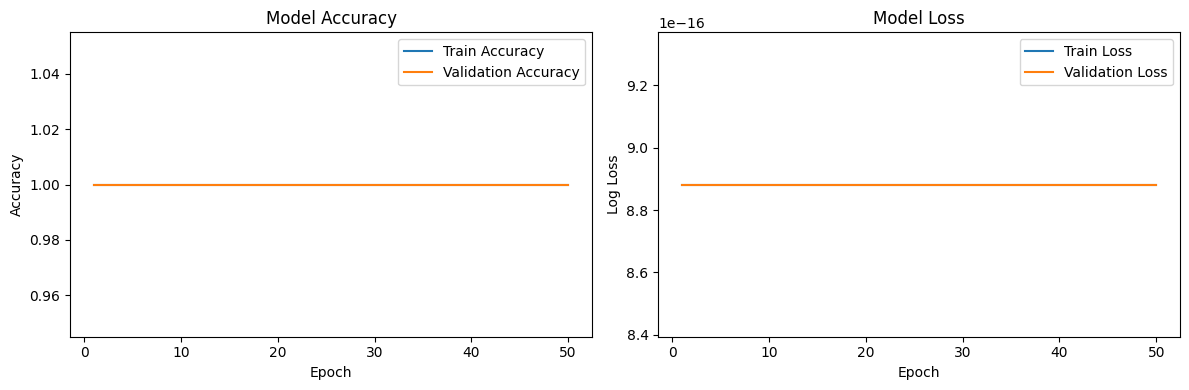

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(range(1, 51), history['train_acc'], label='Train Accuracy', color='tab:blue')
ax1.plot(range(1, 51), history['val_acc'], label='Validation Accuracy', color='tab:orange')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(range(1, 51), history['train_loss'], label='Train Loss', color='tab:blue')
ax2.plot(range(1, 51), history['val_loss'], label='Validation Loss', color='tab:orange')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Log Loss')
ax2.legend()

plt.tight_layout()
plt.show()

In [36]:
pca = PCA(n_components=2)  
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

In [37]:
knnPCA = KNeighborsClassifier(n_neighbors=5)
knnPCA.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [39]:
y_pred_PCA = knnPCA.predict(X_test_pca)

In [41]:
cr = classification_report(y_test,y_pred_PCA)
print(cr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       160
           1       0.90      0.92      0.91        50
           2       1.00      0.99      0.99       162
           3       0.93      0.97      0.95       156
           4       1.00      0.86      0.92        50

    accuracy                           0.97       578
   macro avg       0.96      0.95      0.95       578
weighted avg       0.97      0.97      0.97       578



In [42]:
conf_matrix = confusion_matrix(y_test,y_pred_PCA)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[160   0   0   0   0]
 [  0  46   0   4   0]
 [  2   0 160   0   0]
 [  0   5   0 151   0]
 [  0   0   0   7  43]]


<Axes: >

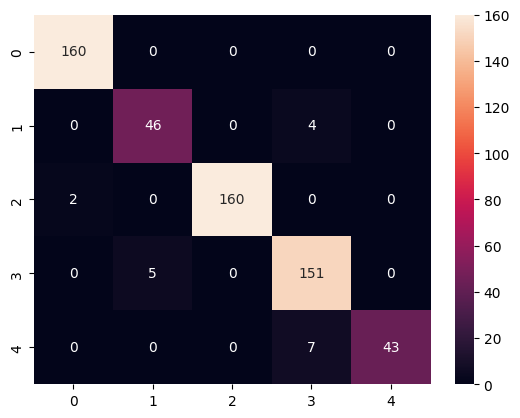

In [55]:
sns.heatmap(conf_matrix, annot=True, fmt='g')

In [46]:
y_pred_prob = knnPCA.predict_proba(X_test_pca)

In [48]:
roc_auc = roc_auc_score(y_test,y_pred_prob,multi_class='ovr')
print(f'ROC AUC on Test Set: {roc_auc:.2f}')

ROC AUC on Test Set: 1.00


In [49]:
history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
for epoch in range(1, 6):
    print(f"Epoch {epoch}")
    
    knn.fit(X_train_pca, y_train)
    
    y_train_prob = knn.predict_proba(X_train_pca)
    y_val_prob = knn.predict_proba(X_test_pca)
    
    y_train_pred = knn.predict(X_train_pca)
    y_val_pred = knn.predict(X_test_pca)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_test, y_val_pred)
    
    train_loss = log_loss(y_train, y_train_prob)
    val_loss = log_loss(y_test, y_val_prob)
    
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['train_acc'].append(train_acc)
    history['val_acc'].append(val_acc)
    
    print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
    print(f"Train Accuracy: {train_acc:.4f} | Val Accuracy: {val_acc:.4f}")

Epoch 1
Train Loss: 0.0384 | Val Loss: 0.0400
Train Accuracy: 0.9819 | Val Accuracy: 0.9879
Epoch 2
Train Loss: 0.0384 | Val Loss: 0.0400
Train Accuracy: 0.9819 | Val Accuracy: 0.9879
Epoch 3
Train Loss: 0.0384 | Val Loss: 0.0400
Train Accuracy: 0.9819 | Val Accuracy: 0.9879
Epoch 4
Train Loss: 0.0384 | Val Loss: 0.0400
Train Accuracy: 0.9819 | Val Accuracy: 0.9879
Epoch 5
Train Loss: 0.0384 | Val Loss: 0.0400
Train Accuracy: 0.9819 | Val Accuracy: 0.9879


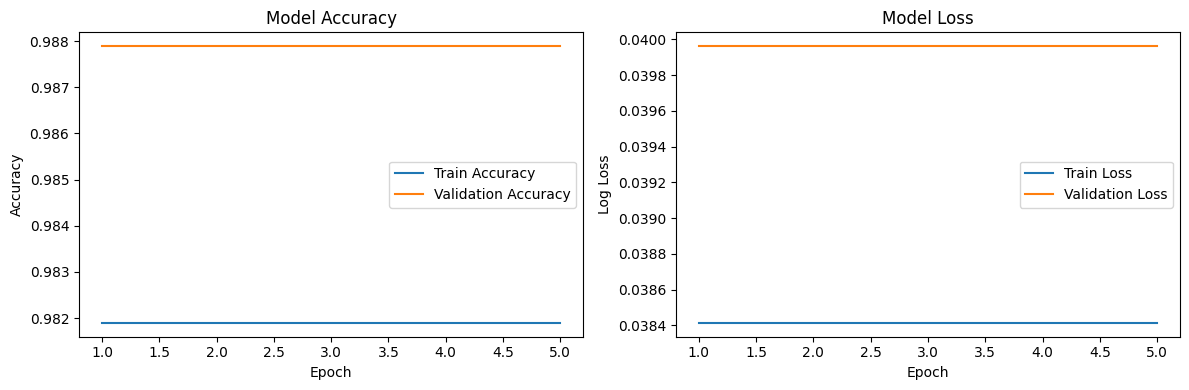

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(range(1, 6), history['train_acc'], label='Train Accuracy', color='tab:blue')
ax1.plot(range(1, 6), history['val_acc'], label='Validation Accuracy', color='tab:orange')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(range(1, 6), history['train_loss'], label='Train Loss', color='tab:blue')
ax2.plot(range(1, 6), history['val_loss'], label='Validation Loss', color='tab:orange')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Log Loss')
ax2.legend()

plt.tight_layout()
plt.show()